In [211]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import funs_project as fp
import matplotlib.colors as mcolors

In [2]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"

In [3]:
files= {"Gorssel": "simulation/generated/genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz",
       "Overijssel": "simulation/generated/genscen_Overijssel_50000_12-06-2021-02-18-42.tar.gz",
       "Deventer": "simulation/generated/genscen_Deventer_50000_12-06-2021-02-25-33.tar.gz"}

experiments = {}
outcomes = {}
model = {}
uncertainties = {}
x = {}
for k, v in files.items():
    experiments[k], outcomes[k] = load_results(v)
    model, _ = get_model_for_problem_formulation(k)
    uncertainties[k] = [uncertainty.name for uncertainty in model.uncertainties]
    x[k] = experiments[k][uncertainties[k]]
    outcomes[k] = pd.DataFrame(outcomes[k])
    
# gexperiments, goutcomes = load_results("simulation/generated/genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz")
# oexperiments, ooutcomes = load_results("simulation/generated/genscen_Overijssel_50000_12-06-2021-02-18-42.tar.gz")
# dexperiments, doutcomes = load_results("simulation/generated/genscen_Deventer_50000_07-06-2021-18-18-21.tar.gz")
# g_model, _ = get_model_for_problem_formulation("Gorssel")
# o_model, _ = get_model_for_problem_formulation("Overijssel")
# d_model, _ = get_model_for_problem_formulation("Deventer")
# ouncertainties = [uncertainty.name for uncertainty in o_model.uncertainties]
# x = experiments[uncertainties]
# outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes["Gorssel"].columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [8]:
outcomes["Deventer"].columns.values.tolist()

['Deventer Expected Annual Damage',
 'Deventer Expected Number of Deaths',
 'Deventer Total Costs']

In [9]:
outcomes["Overijssel"].columns.values.tolist()

['Gorssel and Deventer Expected Annual Damage',
 'Gorssel and Deventer Expected Number of Deaths',
 'Gorssel and Deventer Total Costs']

Obviously, without any policies inplace, there also aren't any costs for Gorssel.

In [287]:
prim_algs = {}
percentiles = [40, 90]

def conditional(outcome, q):
    global percentiles
    if q == percentiles[0]:
        return outcome < np.percentile(a=outcome, q=q)
    elif q == percentiles[1]:
        return outcome > np.percentile(a=outcome, q=q)  
    else:
        print("g")
            
for actor in ["Overijssel", "Deventer", "Gorssel"]:
    prim_algs[actor] = {}
    if actor=="Overijssel":
        DAMAGE = "Gorssel and Deventer Expected Annual Damage"
    elif actor=="Deventer":
        DAMAGE = "Deventer Expected Annual Damage"
    elif actor=="Gorssel":
        DAMAGE = "Gorssel Expected Annual Damage"
    print(actor, DAMAGE)
    
#     for q in percentiles:
#        prim_algs[actor][q] = prim.Prim(x[actor], outcomes[actor][DAMAGE] > np.percentile(a=outcomes[actor][DAMAGE], q=q), threshold=0.8)
    prim_algs[actor][percentiles[0]] = prim.Prim(x[actor], outcomes[actor][DAMAGE] < np.percentile(a=outcomes[actor][DAMAGE], q=percentiles[0]), threshold=0.8)
    prim_algs[actor][percentiles[1]] = prim.Prim(x[actor], outcomes[actor][DAMAGE] > np.percentile(a=outcomes[actor][DAMAGE], q=percentiles[1]), threshold=0.8)
        #code block below performs a rotation of data
    #     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
    #     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
    #     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=90))
    #     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
    #     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
    #     x = rotated_x

Overijssel Gorssel and Deventer Expected Annual Damage
Deventer Deventer Expected Annual Damage
Gorssel Gorssel Expected Annual Damage


In [288]:
boxes = {}
for actor in ["Overijssel", "Deventer", "Gorssel"]:
    boxes[actor] = {}
    for q in percentiles:
        boxes[actor][q] = prim_algs[actor][q].find_box()

Overijssel


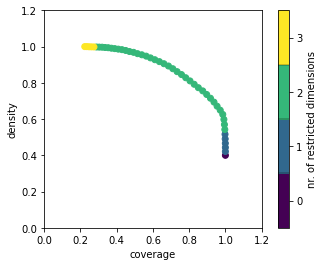

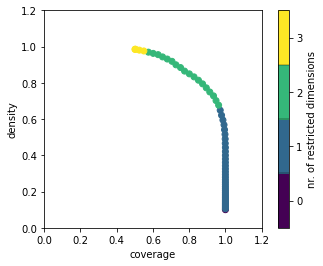

Deventer


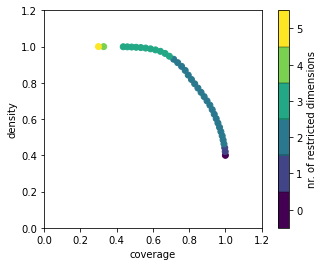

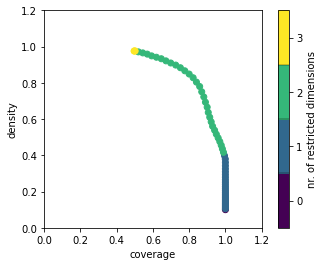

Gorssel


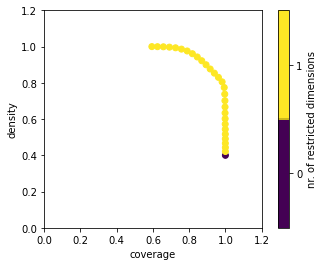

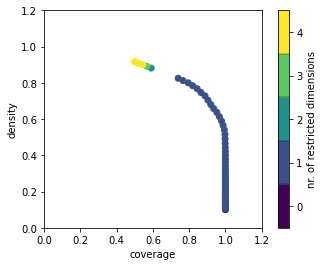

In [289]:
for actor, q in boxes.items():
    print(actor)
    for key, box in q.items():
        box.show_tradeoff()
        plt.show()

# Trying around to find the right box

Overijssel
coverage     0.80475
density     0.810627
id                18
mass          0.3971
mean        0.810627
res_dim            2
Name: 18, dtype: object

            box 18                                          
               min       max                       qp values
A.5_pfail  0.53754  0.999986                     [0.0, -1.0]
A.4_pfail  0.14291  0.999986  [8.157749483849377e-239, -1.0]



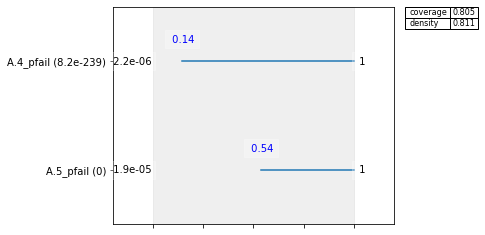

coverage      0.8512
density     0.814545
id                44
mass          0.1045
mean        0.814545
res_dim            2
Name: 44, dtype: object

             box 44                                          
                min       max                       qp values
A.5_pfail  0.000019  0.115677                     [-1.0, 0.0]
A.4_pfail  0.098869  0.999986  [1.5503341633259234e-19, -1.0]



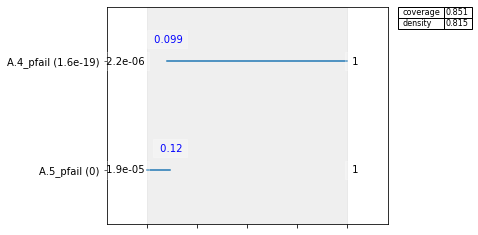

Deventer
coverage     0.81265
density     0.818585
id                18
mass          0.3971
mean        0.818585
res_dim            2
Name: 18, dtype: object

                 box 18                       
                    min       max    qp values
A.4_pfail  4.683069e-07  0.568660  [-1.0, 0.0]
A.5_pfail  3.016385e-01  0.999992  [0.0, -1.0]



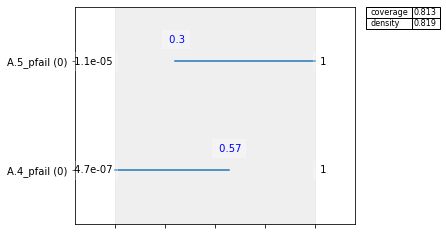

coverage      0.8402
density     0.804019
id                44
mass          0.1045
mean        0.804019
res_dim            2
Name: 44, dtype: object

             box 44                                          
                min       max                       qp values
A.5_pfail  0.000011  0.116059                     [-1.0, 0.0]
A.4_pfail  0.097408  0.999984  [1.3617141444186901e-24, -1.0]



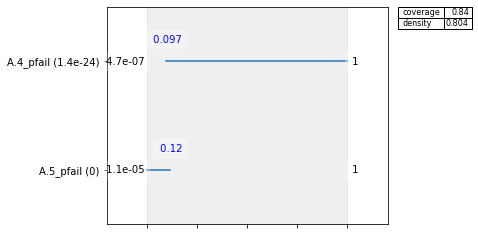

Gorssel
coverage    0.981849
density     0.805447
id                14
mass         0.48758
mean        0.805447
res_dim            1
Name: 14, dtype: object

             box 14                       
                min       max    qp values
A.4_pfail  0.512426  0.999988  [0.0, -1.0]



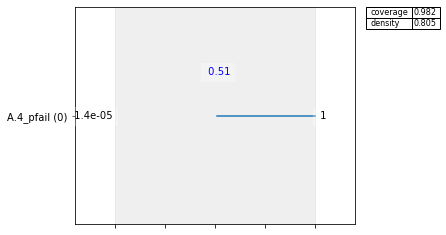

coverage      0.7944
density     0.800322
id                45
mass         0.09926
mean        0.800322
res_dim            1
Name: 45, dtype: object

             box 45                       
                min       max    qp values
A.4_pfail  0.000014  0.099266  [-1.0, 0.0]



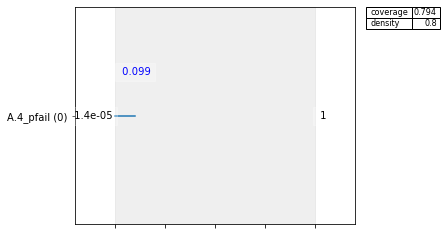

,actor,percentile,uncertainty,min,max
0,Overijssel,40,A.4_pfail,1.429103e-01,0.999986
0,Overijssel,40,A.5_pfail,5.375402e-01,0.999986
0,Overijssel,90,A.4_pfail,9.886855e-02,0.999986
0,Overijssel,90,A.5_pfail,1.896035e-05,0.115677
0,Deventer,40,A.5_pfail,3.016385e-01,0.999992
0,Deventer,40,A.4_pfail,4.683069e-07,0.568660
0,Deventer,90,A.4_pfail,9.740765e-02,0.999984
0,Deventer,90,A.5_pfail,1.088211e-05,0.116059
0,Gorssel,40,A.4_pfail,5.124263e-01,0.999988
0,Gorssel,90,A.4_pfail,1.355945e-05,0.099266


In [290]:
#Retarded...and beyond
limits = pd.DataFrame(columns=["actor", "percentile", "uncertainty", "min", "max" ])
for actor, q in boxes.items():
    print(actor)
    for p, value in q.items():
        data = boxes[actor][p].peeling_trajectory
        box_id = data.loc[data["density"] >= 0.8].sort_values(by="density", ascending=True).head(1).id.values[0]
        
        if box_id == 0:
            box_id = 1
            
        boxes[actor][p].inspect(box_id)
        boxes[actor][p].inspect(box_id, style='graph')
        locs, labels = plt.yticks()
        lims = boxes[actor][p].box_lims[box_id]
        for label in labels:
            text = label.get_text()
            before, keyword, after = text.partition(" ")
            limits = pd.concat([limits, pd.DataFrame(data={"actor": actor, "percentile": p, "uncertainty": before, "min": [lims[before][0]], "max" :  [lims[before][1]]})], axis=0)
        plt.show()
limits
        

In [291]:
limits.reset_index(drop=True, inplace=True)

In [292]:
scenario = {"Gorssel" : pd.read_csv("simulation/optimisation/Gorssel/selected.csv"),
            "Overijssel" : pd.read_csv("simulation/optimisation/Overijssel/selected.csv"),
            "Deventer" : pd.read_csv("simulation/optimisation/Deventer/selected.csv")}

In [293]:
cases = {"Gorssel": fp.gcases,
        "Overijssel": fp.ocases,
        "Deventer": fp.dcases}

In [294]:
limits

,actor,percentile,uncertainty,min,max
0,Overijssel,40,A.4_pfail,1.429103e-01,0.999986
1,Overijssel,40,A.5_pfail,5.375402e-01,0.999986
2,Overijssel,90,A.4_pfail,9.886855e-02,0.999986
3,Overijssel,90,A.5_pfail,1.896035e-05,0.115677
4,Deventer,40,A.5_pfail,3.016385e-01,0.999992
5,Deventer,40,A.4_pfail,4.683069e-07,0.568660
6,Deventer,90,A.4_pfail,9.740765e-02,0.999984
7,Deventer,90,A.5_pfail,1.088211e-05,0.116059
8,Gorssel,40,A.4_pfail,5.124263e-01,0.999988
9,Gorssel,90,A.4_pfail,1.355945e-05,0.099266


# Artistry

In [344]:
unique_cases = set()
for actors, dic in cases.items():
    unique_cases |= set(dic.values())

In [538]:
unique_cases_list = list(unique_cases)
superlist = [unique_cases_list[3], unique_cases_list[2], unique_cases_list[6], unique_cases_list[5], unique_cases_list[4], unique_cases_list[0], unique_cases_list[1]]
superlist[5]

'worst damage'

In [546]:
cmap = mcolors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
cases_colors = [cmap(i) for i in np.arange(0, 1, 1/7)]
cases_colors[4] = "blue"
cases_colors[5] = "purple"
scen_colors = dict(zip(superlist, cases_colors))
scen_colors

{'best': (0.0, 0.5019607843137255, 0.0, 1.0),
 'low': (0.2823529411764706, 0.6425836216839678, 0.0, 1.0),
 'middle': (0.5725490196078431, 0.7871126489811611, 0.0, 1.0),
 'high': (0.8549019607843137, 0.9277354863514033, 0.0, 1.0),
 'worst deaths': 'blue',
 'worst damage': 'purple',
 'absolute worst': (1.0, 0.2823529411764706, 0.0, 1.0)}

In [594]:
colors= {"Overijssel": "c",
         "Gorssel": "brown",
         "Deventer": "m"    
}

In [595]:
for actor in ["Gorssel", "Overijssel", "Deventer"]:
    scenario[actor]["scenario"] = scenario[actor].index
    scenario[actor]["scenario"].replace(cases[actor], inplace=True)

In [605]:
limits

,actor,percentile,uncertainty,min,max
0,Overijssel,40,A.4_pfail,1.429103e-01,0.999986
1,Overijssel,40,A.5_pfail,5.375402e-01,0.999986
2,Overijssel,90,A.4_pfail,9.886855e-02,0.999986
3,Overijssel,90,A.5_pfail,1.896035e-05,0.115677
4,Deventer,40,A.5_pfail,3.016385e-01,0.999992
5,Deventer,40,A.4_pfail,4.683069e-07,0.568660
6,Deventer,90,A.4_pfail,9.740765e-02,0.999984
7,Deventer,90,A.5_pfail,1.088211e-05,0.116059
8,Gorssel,40,A.4_pfail,5.124263e-01,0.999988
9,Gorssel,90,A.4_pfail,1.355945e-05,0.099266


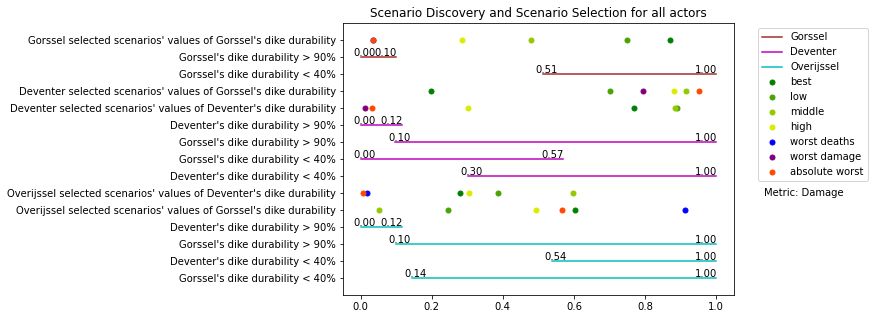

In [652]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
i = 0
yticks = []
for index, row in limits.iterrows():
    plt.plot([row["min"],row["max"]], [i,i], color=colors[row["actor"]], label=row["actor"])
    ax.annotate('{:.2f}'.format(row["min"]),xy=(row["min"]-0.02,i +0.06))
    ax.annotate('{:.2f}'.format(row["max"]),xy=(row["max"]-0.06,i +0.06))
    i += 1
    
    if row["percentile"] == percentiles[1]:
        perc_text = "> " + str(row["percentile"]) + "%"
    else:
        perc_text = "< " + str(row["percentile"]) + "%"

    if row["uncertainty"] == "A.4_pfail":
        unc_text = "Gorssel's dike durability"
    elif row["uncertainty"] == "A.5_pfail":
        unc_text = "Deventer's dike durability"
    
        
    yticks.append(unc_text + " " + perc_text)

    
    if (index + 1 == limits.shape[0]) or (limits.iloc[index + 1]["actor"] != row["actor"]) :
        unc_sens = scenario[row["actor"]]
        act_uncs =limits.loc[limits["actor"] == row["actor"]]["uncertainty"].unique()
        for act_unc in act_uncs:
            
            if act_unc == "A.4_pfail":
                unc_text = "Gorssel's dike durability"
            elif act_unc == "A.5_pfail":
                unc_text = "Deventer's dike durability"
        
            for _, innerrow in unc_sens.iterrows():
                plt.plot(innerrow[act_unc], i, markersize=5, linestyle="None",  marker='o', c=scen_colors[innerrow["scenario"]], label=innerrow["scenario"])
            i+=1
        
#         for _, innerrow in unc_sens.iterrows():
#             plt.plot(innerrow[row["uncertainty"]], i, markersize=5, linestyle="None",  marker='o', c=scen_colors[innerrow["scenario"]], label=innerrow["scenario"])
            yticks.append(row["actor"] + " selected scenarios' values of " + unc_text)
        #i+= 1

ax.grid(False)
ax.set_ylim([-1,i])
handles, labels = plt.gca().get_legend_handles_labels()
order = [33, 19, 0, 4, 5, 6, 7, 8, 25 ,9]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(range(i), yticks)
plt.title("Scenario Discovery and Scenario Selection for all actors")
plt.figtext(0.96, 0.4, "Metric: Damage")

plt.savefig("../../report/figures/results/scenario_discovery.png", bbox_inches="tight")
plt.show()

#Gorssel probability of dike success